In [31]:
#Import packages
import csv
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Generate a list of colors based on the "bright" color scheme
colors = sns.color_palette('bright', n_colors=12)

In [35]:
df = pandas.read_csv('/Users/patrickmoll/Desktop/cis590data/DateTimeCleanedData/DateTimeCleanedReservationsAll.csv')
df['Reservation Count'] = 1
df['StatusFac'] = pd.factorize(df['Status'])[0]
df.head()

,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,Headcount,BeginTimeDate,EndTimeDate,Duration Minutes,Weekday,Month,Year,BeginTime,Reservation Count,StatusFac
0,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,100.000000,2013-01-06 09:00:00,2013-01-06 12:30:00,210.0,6,1,2013,9.0,1,0
1,BDMUL,CARN,HRTG,Heritage Room l,Firm,Facility,100.000000,2013-01-06 17:00:00,2013-01-06 23:00:00,360.0,6,1,2013,17.0,1,0
2,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-07 17:30:00,2013-01-07 18:25:00,55.0,0,1,2013,17.5,1,0
3,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-09 17:30:00,2013-01-09 18:25:00,55.0,2,1,2013,17.5,1,0
4,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-09 19:00:00,2013-01-09 20:15:00,75.0,2,1,2013,19.0,1,0


In [33]:
#sns.catplot(data=df, x="Year", y="Headcount", hue="Status", kind="swarm")
print(df['Status'].corr(df['Year']))
print(stats.ttest_ind(a=df['Status'], b=df['Year'], equal_var=False))


0.5082374172213879
Ttest_indResult(statistic=-262486.2428205085, pvalue=0.0)


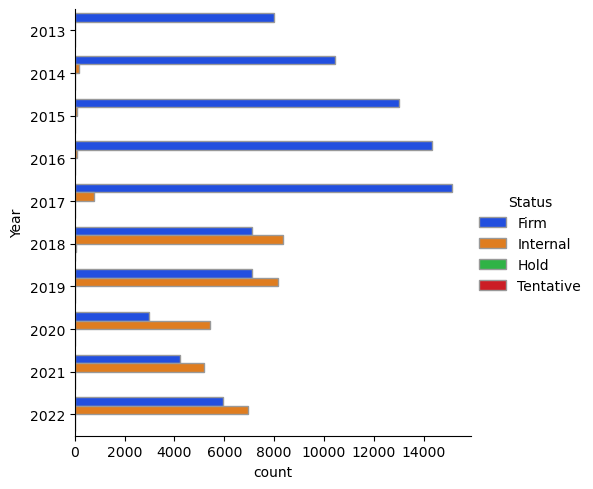

In [37]:
sns.catplot(
    data=df, y="Year", hue="Status", kind="count",
    palette="bright", edgecolor=".6", errorbar="se"
)

plt.savefig('figures/status_by_year.pdf')

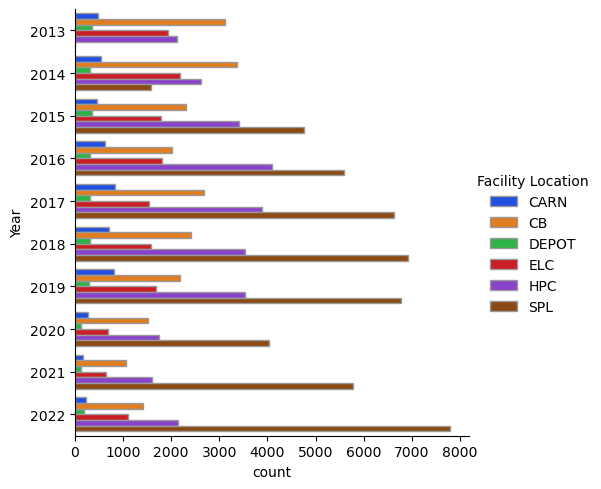

In [100]:
sns.catplot(
    data=df, y="Year", hue="Facility Location", kind="count",
    palette="bright", edgecolor=".6", errorbar="se"
)
plt.savefig('figures/facilitylocation_by_year.pdf')

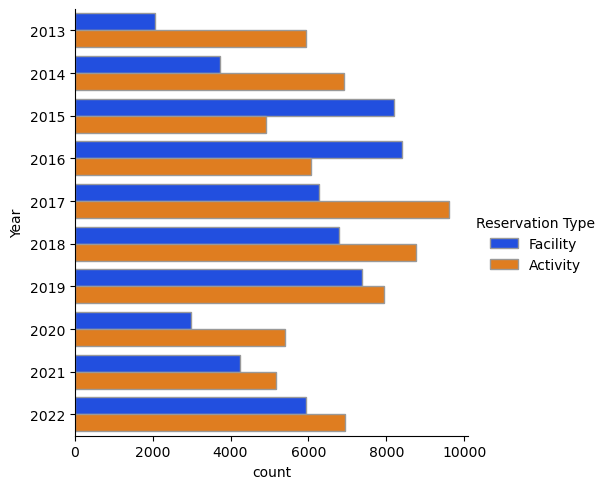

In [39]:
indexAge = df[ (df['Status'] == 'Hold') | (df['Status'] == 'Tentative') ].index
sns.catplot(
    data=df, y="Year", hue="Reservation Type", kind="count",
    palette="bright", edgecolor=".6", errorbar="se"
)

In [90]:
df['isPost2017'] = df['Year'].apply(lambda x: "Yes" if x > 2017 else "No")
df.head()

,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,Headcount,BeginTimeDate,EndTimeDate,Duration Minutes,Weekday,Month,Year,BeginTime,Reservation Count,StatusFac,isPost2017
0,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,100.000000,2013-01-06 09:00:00,2013-01-06 12:30:00,210.0,6,1,2013,9.0,1,0,No
1,BDMUL,CARN,HRTG,Heritage Room l,Firm,Facility,100.000000,2013-01-06 17:00:00,2013-01-06 23:00:00,360.0,6,1,2013,17.0,1,0,No
2,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-07 17:30:00,2013-01-07 18:25:00,55.0,0,1,2013,17.5,1,0,No
3,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-09 17:30:00,2013-01-09 18:25:00,55.0,2,1,2013,17.5,1,0,No
4,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-09 19:00:00,2013-01-09 20:15:00,75.0,2,1,2013,19.0,1,0,No


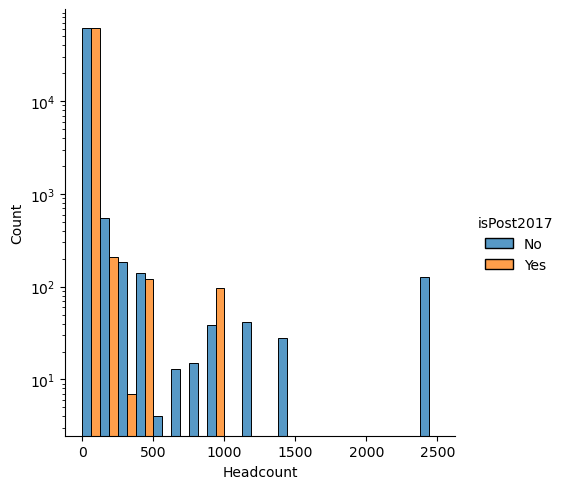

In [102]:
sns.displot(df, x="Headcount", hue="isPost2017", multiple="dodge", bins=20)
plt.yscale('log')
plt.savefig('figures/headcountisPost2017.pdf')

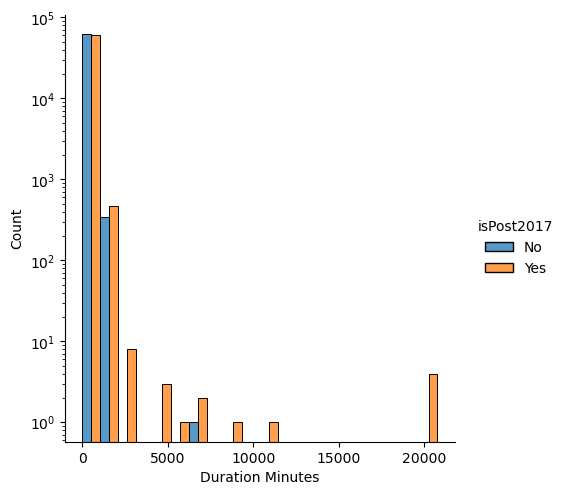

In [103]:
sns.displot(df, x="Duration Minutes", hue="isPost2017", multiple="dodge", bins=20, )
plt.yscale('log')
plt.savefig('figures/durationMinutesisPost2017.pdf')

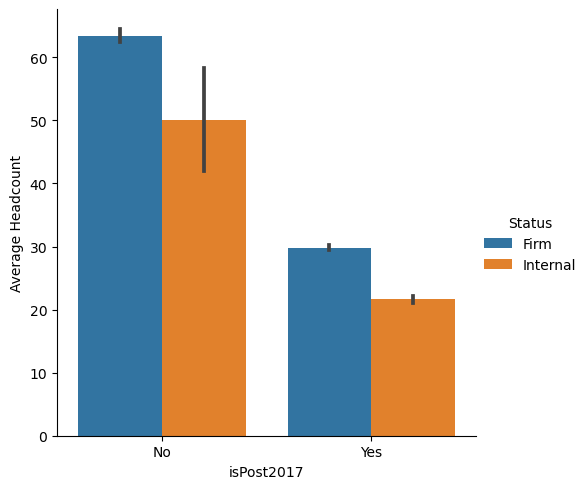

In [104]:
plt = sns.catplot(data=df, x="isPost2017", y="Headcount", hue="Status", kind="bar")
plt.set(ylabel = "Average Headcount")
plt.savefig('figures/averageHeadcountisPost2017.pdf')

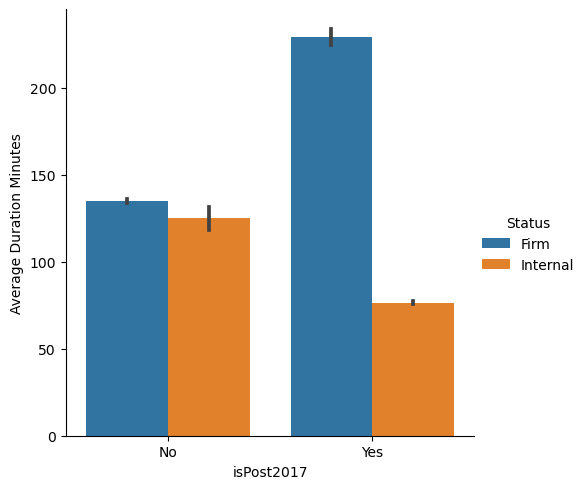

In [106]:
plt = sns.catplot(data=df, x="isPost2017", y="Duration Minutes", hue="Status", kind="bar")
plt.set(ylabel = "Average Duration Minutes")
plt.savefig('figures/averageDurationMinutesisPost2017.pdf')